In [622]:
# data = (clean_returns - clean_returns.mean(axis=0))/clean_returns.std(axis=0)
# model = decomposition.FactorAnalysis(n_components=2,tol=1e-8,max_iter=1000)
# model.fit(data)
# Y = model.fit_transform(data)
# data_comp = pd.DataFrame(np.dot(Y, (model.components_)), columns = data.columns, index = data.index)
# fa_weights = pd.DataFrame(model.components_, columns = data.columns)

In [642]:
import pandas as pd
import numpy as np
import os
from scipy import signal
import statsmodels
from scipy.stats import norm
from math import factorial
import time
from scipy import stats
import scipy as scipy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.6f}'.format
np.set_printoptions(threshold=5)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [472]:
import os
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
from sklearn import decomposition
from sklearn.decomposition import SparsePCA

yf.pdr_override()

START_DATE = "2010-01-01"
END_DATE = "2015-01-01"

In [473]:
tickers_mapping = pd.read_csv('Tickers.csv',  encoding='latin-1')
tickers_sorted = tickers_mapping.sort_values(['Sector']).Symbol
tickers_mapping.index = tickers_mapping['Symbol']

prices = pd.read_csv('stocks.csv')
prices.index = pd.DatetimeIndex(prices['Unnamed: 0'])
prices = prices.iloc[:,1:]
index = pd.read_csv('index.csv')
index.index = pd.DatetimeIndex(index['Date'])
raw_prices = pd.concat([prices, index['Adj Close'].rename('INDEX')], axis=1)        

returns = raw_prices.pct_change(1)
betas = ((returns.rolling(60).corr(returns['INDEX']))*\
                            (returns.rolling(60).std().div(returns['INDEX'].rolling(60).std(),axis = 0))).shift(1)
idio_returns = returns - betas.mul(returns['INDEX'], axis = 0)
idio_std_returns = idio_returns.div(idio_returns.std(0), 1)

clean_returns = returns.loc[:,tickers_sorted].dropna(0, how = 'all').dropna(1)
clean_idio_returns = idio_returns.loc[:,tickers_sorted].dropna(0, how = 'all').dropna(1)
clean_idio_std_returns = idio_std_returns.loc[:,tickers_sorted].dropna(0, how = 'all').dropna(1)

In [648]:
data = (clean_returns - clean_returns.mean(axis=0))/clean_returns.std(axis=0)
model = decomposition.PCA(n_components=11,tol=1e-8)
model.fit(data)
Y = model.fit_transform(data)
data_comp = pd.DataFrame(np.dot(Y, (model.components_)), columns = data.columns, index = data.index)
pca_weights = (pd.DataFrame(model.components_, columns = data.columns))
print(np.sqrt(((data - data_comp)**2).mean().mean()))
print(pd.Series(model.explained_variance_ratio_ ))

0.6648046888304084
0    0.441017
1    0.030254
2    0.015927
3    0.013628
4    0.013357
5    0.009140
6    0.008565
7    0.007421
8    0.006708
9    0.006257
10   0.005409
dtype: float64


In [638]:
data = (clean_returns - clean_returns.mean(axis=0))/clean_returns.std(axis=0)
model = decomposition.SparsePCA(n_components=11, tol=1e-8, alpha = 1, ridge_alpha = 0.1)
model.fit(data)
Y = model.fit_transform(data)
data_comp = pd.DataFrame(np.dot(Y, (model.components_)), columns = data.columns, index = data.index)
print(np.sqrt(((data - data_comp)**2).mean().mean()))
spca_weights = pd.DataFrame(model.components_, columns = data.columns)

0.6700335445621745


In [656]:
pd.concat([norm_weights.T[[4]], tickers_mapping[['Sector']]], 1).groupby(['Sector']).sum()

,4
Sector,
Communication Services,0.345958
Consumer Discretionary,0.601208
Consumer Staples,-2.454580
Energy,4.150774
Financials,-10.989218
Health Care,-3.553115
Industrials,1.067186
Information Technology,4.288258
Materials,2.075221


0 pos: 447 neg 0
0 pos: 1.0 neg 0.0
1 pos: 151 neg 296
1 pos: 15.147222472313704 neg -14.1472224723137
2 pos: 274 neg 173
2 pos: 5.193594805106214 neg -4.193594805106215
3 pos: 195 neg 252
3 pos: 10.156368281171824 neg -9.156368281171824
4 pos: 234 neg 213
4 pos: 22.130283240327554 neg -21.130283240327554


0  0   1.000000
1  1   1.000000
2  2   1.000000
3  3   1.000000
4  4   1.000000
dtype: float64

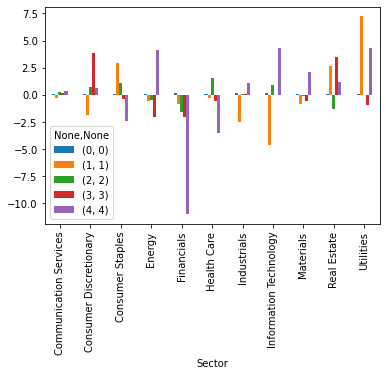

In [651]:
norm_weights = pca_weights.div(pca_weights.sum(1), 0)

tmp = {}
for i in range(5):
    print (i, 'pos:' , (norm_weights.T[[i]] > 0).sum().sum(), 'neg', (norm_weights.T[[i]] < 0).sum().sum())
    print (i, 'pos:' , norm_weights.T[[i]][(norm_weights.T[[i]] > 0)].sum().sum(), \
           'neg', norm_weights.T[[i]][(norm_weights.T[[i]] < 0)].sum().sum())       
    tmp[i] = pd.concat([norm_weights.T[[i]], tickers_mapping[['Sector']]], 1).groupby(['Sector']).sum()
    
pd.concat(tmp, 1).plot(kind='bar')
pd.concat(tmp, 1).sum()

0 pos: 274 neg 5
0 pos: 1.0022274514534804 neg -0.002227451453480276
1 pos: 163 neg 8
1 pos: 1.0059119260512117 neg -0.005911926051212143
2 pos: 242 neg 16
2 pos: 1.0204452300608313 neg -0.020445230060831248
3 pos: 188 neg 4
3 pos: 1.004360900666101 neg -0.004360900666101226
4 pos: 239 neg 5
4 pos: 1.0054667852127495 neg -0.005466785212749503
5 pos: 233 neg 8
5 pos: 1.0048802581675764 neg -0.004880258167576272
6 pos: 197 neg 5
6 pos: 1.002600689861302 neg -0.00260068986130198
7 pos: 245 neg 18
7 pos: 1.0141312749045621 neg -0.014131274904562258
8 pos: 187 neg 6
8 pos: 1.0037352715362473 neg -0.0037352715362473877
9 pos: 205 neg 8
9 pos: 1.0069255568921518 neg -0.006925556892151866


0  0   1.000000
1  1   1.000000
2  2   1.000000
3  3   1.000000
4  4   1.000000
5  5   1.000000
6  6   1.000000
7  7   1.000000
8  8   1.000000
9  9   1.000000
dtype: float64

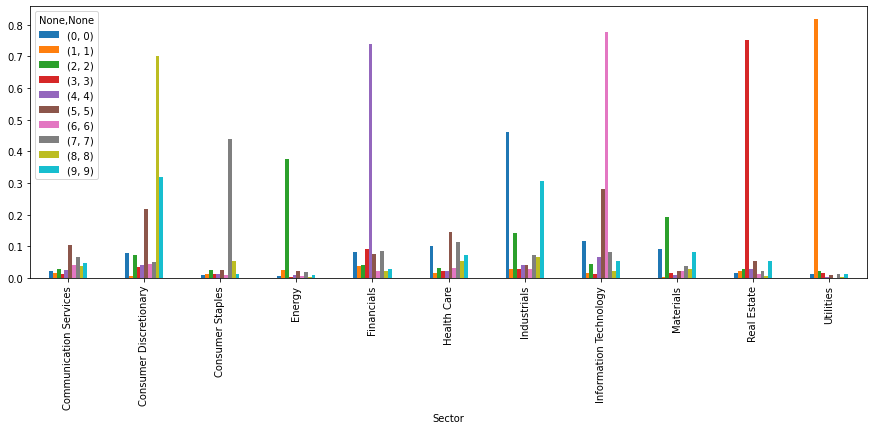

In [659]:
norm_weights = spca_weights.div(spca_weights.sum(1), 0)

tmp = {}
for i in range(10):
    print (i, 'pos:' , (norm_weights.T[[i]] > 0).sum().sum(), 'neg', (norm_weights.T[[i]] < 0).sum().sum())
    print (i, 'pos:' , norm_weights.T[[i]][(norm_weights.T[[i]] > 0)].sum().sum(), \
           'neg', norm_weights.T[[i]][(norm_weights.T[[i]] < 0)].sum().sum())
    tmp[i] = pd.concat([norm_weights.T[[i]], tickers_mapping[['Sector']]], 1).groupby(['Sector']).sum()
    
pd.concat(tmp, 1).plot(kind='bar', figsize=(15,5))
pd.concat(tmp, 1).sum()

In [660]:
pd.concat([norm_weights.T[[4]], tickers_mapping[['Sector']]], 1).groupby(['Sector']).sum()

,4
Sector,
Communication Services,0.025849
Consumer Discretionary,0.042457
Consumer Staples,0.011687
Energy,0.010042
Financials,0.738591
Health Care,0.023301
Industrials,0.042499
Information Technology,0.066367
Materials,0.008720


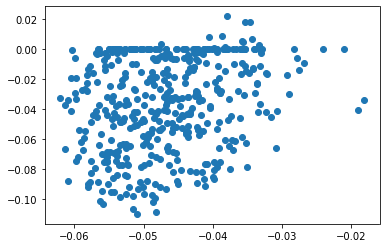

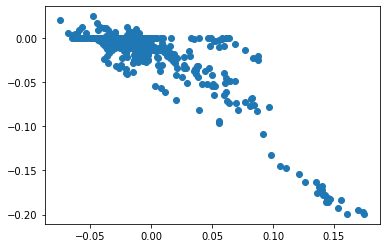

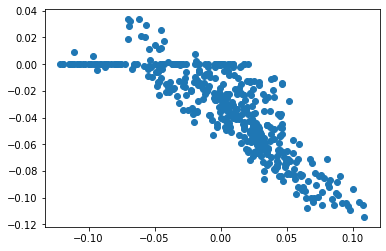

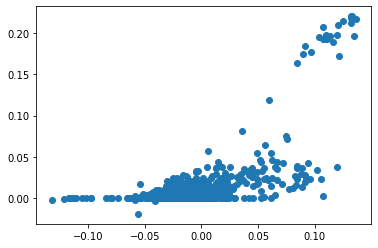

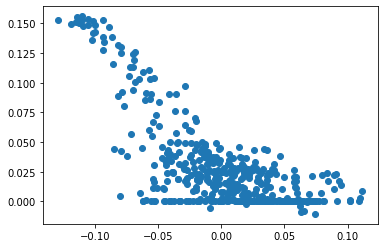

In [633]:
for i in range(5):
    weights = pd.concat([pca_weights.iloc[i], spca_weights.iloc[i]], 1)
    weights.columns = ['PCA', 'FA']
    plt.scatter(weights.PCA, weights.FA)
    plt.show()

In [634]:
pd.DataFrame(Y).corr()

,0,1,2,3,4
0,1.000000,0.506605,0.729353,-0.669814,-0.799410
1,0.506605,1.000000,0.559900,-0.627266,-0.576066
2,0.729353,0.559900,1.000000,-0.630585,-0.709500
3,-0.669814,-0.627266,-0.630585,1.000000,0.701403
4,-0.799410,-0.576066,-0.709500,0.701403,1.000000


In [635]:
count = 0
pd.concat([pca_weights.T.sort_values(count)[:5], pca_weights.T.sort_values(count)[-5:]],0)

,0,1,2,3,4
TROW,-0.062063,-0.010115,-0.038725,-0.016250,-0.041425
IVZ,-0.061313,-0.012625,-0.035164,-0.026123,-0.035516
HON,-0.061285,-0.022589,0.011580,-0.029530,0.005782
IEX,-0.060870,-0.039910,0.001668,0.005798,0.036554
L,-0.060851,0.007298,-0.047348,-0.058728,-0.028365
MNST,-0.026893,0.018345,0.055070,0.020842,0.023161
DG,-0.024153,0.000219,0.052737,0.080490,-0.022092
VRTX,-0.021100,0.002103,0.050370,0.024341,-0.019315
NEM,-0.018987,0.008477,-0.045367,-0.048551,0.101948
NFLX,-0.018137,-0.044898,0.024582,0.052416,0.031864


In [636]:
tickers_mapping.loc[pca_weights.T.sort_values(0)[-20:].index]

,Symbol,Name,Sector,Industry
WBA,WBA,Walgreens Boots Alliance,Consumer Staples,Drug Retail
CMG,CMG,Chipotle Mexican Grill,Consumer Discretionary,Restaurants
AZO,AZO,AutoZone Inc,Consumer Discretionary,Specialty Stores
GILD,GILD,Gilead Sciences,Health Care,Biotechnology
TMUS,TMUS,T-Mobile US,Communication Services,Wireless Telecommunication Services
AAP,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
ABMD,ABMD,Abiomed,Health Care,Health Care Equipment
EXPE,EXPE,Expedia Group,Consumer Discretionary,Internet & Direct Marketing Retail
FTNT,FTNT,Fortinet,Information Technology,Systems Software
ULTA,ULTA,Ulta Beauty,Consumer Discretionary,Specialty Stores


In [637]:
pd.DataFrame(Y, index = data.index).corrwith(returns['INDEX'])

0   -0.918951
1   -0.687913
2   -0.857394
3    0.762336
4    0.904170
dtype: float64

<AxesSubplot:>

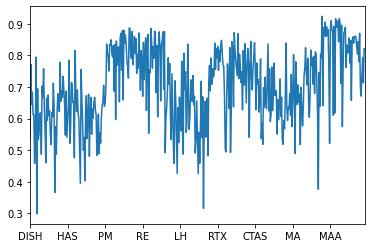

In [436]:
pd.DataFrame(data_comp, index=data.index, columns=data.columns).corrwith(data).plot()